In [1]:
import platform

print("### Pypy3 env")
os.system("pypy3 --version")

print("### Python3 env")
os.system("python3 --version")

print("### Ruby env")
os.system("ruby --version")

print("### Host OS")
uname = platform.uname()
print(f"System: {uname.system}")
print(f"Release: {uname.release}")
print(f"Version: {uname.version}")
print(f"Machine: {uname.machine}")
print(f"Processor: {uname.processor}")
print(f"macOS: {platform.mac_ver()}")

### Pypy3 env
Python 3.7.13 (7e0ae751533460d5f89f3ac48ce366d8642d1db5, Apr 26 2022, 09:29:08)
[PyPy 7.3.9 with GCC Apple LLVM 13.1.6 (clang-1316.0.21.2)]
### Python3 env
Python 3.10.6
### Ruby env
ruby 3.1.2p20 (2022-04-12 revision 4491bb740a) [x86_64-darwin21]
### Host OS
System: Darwin
Release: 21.6.0
Version: Darwin Kernel Version 21.6.0: Sat Jun 18 17:07:25 PDT 2022; root:xnu-8020.140.41~1/RELEASE_X86_64
Machine: x86_64
Processor: i386
macOS: ('12.5', ('', '', ''), 'x86_64')


In [8]:
import os
import numpy as np
result = {
    'contextual': {
        'python3': [],
        'pypy': [],
        'ruby': [],
        'ruby_jit': [],
        'java':[]
    },
    'data_local': {
        'python3': [],
        'pypy': [],
        'ruby': [],
        'ruby_jit': [],
        'java':[]
    },
     'data_remote': {
        'python3': [],
        'pypy': [],
        'ruby': [],
        'ruby_jit': [],
        'java':[]
    },  
    'deletion': {
        'python3': [],
        'pypy': [],
        'ruby': [],
        'ruby_jit': [],
        'java':[]
    },
    'mixture': {
        'python3': [],
        'pypy': [],
        'ruby': [],
        'ruby_jit': [],
        'java':[]
    },
}
# the amount of times each test should be run
# the average is then taken
number_same_test = 20
# the location of the java library, for now the tests are run from there
# example from my pc
#java_library_location = '/home/ntzotchev/kit/bachelor/RObachelor/'
java_library_location = '/Users/pfeil/git/ro-crate-java/'

single_crate_location = 'performance_tests/single_crate/'
# the amount of entities in each test
#num_entities = [500, 1000, 5000, 7500, 10000]
num_entities = [50, 100, 200, 250, 500]
#num_entities = [1, 1, 1, 1, 1]

In [9]:
# java performance

def calc_result_java():
    java_file = open(java_library_location+'contextual_java.txt', 'r')
    java_lines = java_file.readlines()
    b = np.asarray(java_lines, dtype=float)
    result['contextual']['java'].append(np.mean(b))
    os.remove(java_library_location+'contextual_java.txt')

    java_file = open(java_library_location+'data_remote_java.txt', 'r')
    java_lines = java_file.readlines()
    b = np.asarray(java_lines, dtype=float)
    result['data_remote']['java'].append(np.mean(b))
    os.remove(java_library_location+'data_remote_java.txt')
     
    java_file = open(java_library_location+'data_local_java.txt', 'r')
    java_lines = java_file.readlines()
    b = np.asarray(java_lines, dtype=float)
    result['data_local']['java'].append(np.mean(b))
    os.remove(java_library_location+'data_local_java.txt')
    
    java_file = open(java_library_location+'deletion_java.txt', 'r')
    java_lines = java_file.readlines()
    b = np.asarray(java_lines, dtype=float)
    result['deletion']['java'].append(np.mean(b))
    os.remove(java_library_location+'deletion_java.txt')

    java_file = open(java_library_location+'mix_java.txt', 'r')
    java_lines = java_file.readlines()
    b = np.asarray(java_lines, dtype=float)
    result['mixture']['java'].append(np.mean(b))
    os.remove(java_library_location+'mix_java.txt')

print('Starting java performance tests')    

data_path = './data'
base_id = "https://www.example.com/"
for times in num_entities:
    for i in range(number_same_test): 
        os.system("cd " + java_library_location + ";./gradlew performanceContextEntitiesBenchmark --args=\""+str(times)+ ' ' + base_id + '\"')
        os.system("cd " + java_library_location + ";./gradlew performanceLocalDataEntitiesBenchmark --args=\""+str(times) + ' ' + data_path + '\"')
        os.system("cd " + java_library_location + ";./gradlew performanceRemoteDataEntitiesBenchmark --args=\""+str(times) + " " + base_id + '\"')
        os.system("cd " + java_library_location + ";./gradlew performanceMixEntitiesBenchmark --args=\""+str(times) + " " + data_path + '\"')
        os.system("cd " + java_library_location + ";./gradlew performanceDeletionEntitiesBenchmark --args=\""+str(times) + " " + data_path+'\"')
    calc_result_java()

print(result)
    

Starting java performance tests

> Configure project :
Using release profile for building ro-crate-java

> Task :compileJava UP-TO-DATE
> Task :processResources UP-TO-DATE
> Task :classes UP-TO-DATE
> Task :compilePerformanceTestJava UP-TO-DATE
> Task :processPerformanceTestResources NO-SOURCE
> Task :performanceTestClasses UP-TO-DATE

> Task :performanceContextEntitiesBenchmark
50 number of Contextual Entities added in: 0.323 seconds

BUILD SUCCESSFUL in 925ms
4 actionable tasks: 1 executed, 3 up-to-date

> Configure project :
Using release profile for building ro-crate-java

> Task :compileJava UP-TO-DATE
> Task :processResources UP-TO-DATE
> Task :classes UP-TO-DATE
> Task :compilePerformanceTestJava UP-TO-DATE
> Task :processPerformanceTestResources NO-SOURCE
> Task :performanceTestClasses UP-TO-DATE

> Task :performanceLocalDataEntitiesBenchmark
50 number of Data local Entities added in: 0.338 seconds

BUILD SUCCESSFUL in 887ms
4 actionable tasks: 1 executed, 3 up-to-date

> Confi

In [10]:
#python3 calculation
def calc_result_py():
    
    python_file = open('contextual_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['contextual']['python3'].append(np.mean(b))
    os.remove("contextual_py.txt")
    
    python_file = open('data_local_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['data_local']['python3'].append(np.mean(b))
    os.remove("data_local_py.txt")  
    
    python_file = open('data_remote_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['data_remote']['python3'].append(np.mean(b))
    os.remove("data_remote_py.txt")
    
    python_file = open('deletion_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['deletion']['python3'].append(np.mean(b))
    os.remove("deletion_py.txt")
    
    python_file = open('mix_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['mixture']['python3'].append(np.mean(b))
    os.remove("mix_py.txt")

print('Starting python3 performance tests')    

for times in num_entities:
    for i in range(number_same_test):
        os.system("python3 " + single_crate_location + "contextual_entities/example.py " + str(times))
        os.system("python3 " + single_crate_location + "data_entities_local/example.py " + str(times))
        os.system("python3 " + single_crate_location + "data_entities_remote/example.py " + str(times))
        os.system("python3 " + single_crate_location + "mixture/example.py " + str(times))
        os.system("python3 " + single_crate_location + "deletion/example.py " + str(times))
    calc_result_py()

print(result)
    


Starting python3 performance tests
50 0.0007028579711914062
50 0.0015571117401123047
50 0.0007410049438476562
50 0.0035216808319091797
50 0.03747296333312988
50 0.0006856918334960938
50 0.0015621185302734375
50 0.0007610321044921875
50 0.003597736358642578
50 0.037104129791259766
50 0.0006661415100097656
50 0.0015690326690673828
50 0.0007596015930175781
50 0.003454923629760742
50 0.04118609428405762
50 0.0007050037384033203
50 0.0015239715576171875
50 0.0007612705230712891
50 0.003385782241821289
50 0.03745388984680176
50 0.0006630420684814453
50 0.00152587890625
50 0.000762939453125
50 0.003385305404663086
50 0.03679919242858887
50 0.0007770061492919922
50 0.0015239715576171875
50 0.0007569789886474609
50 0.0038280487060546875
50 0.037773847579956055
50 0.0006747245788574219
50 0.0016431808471679688
50 0.0008330345153808594
50 0.0034210681915283203
50 0.03687620162963867
50 0.0006690025329589844
50 0.001497030258178711
50 0.0007479190826416016
50 0.0036590099334716797
50 0.03688812255

In [11]:
#pypy3 calculation
def calc_result_pypy():
    
    python_file = open('contextual_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['contextual']['pypy'].append(np.mean(b))
    os.remove("contextual_py.txt")
    
    python_file = open('data_local_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['data_local']['pypy'].append(np.mean(b))
    os.remove("data_local_py.txt")  
    
    python_file = open('data_remote_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['data_remote']['pypy'].append(np.mean(b))
    os.remove("data_remote_py.txt")
    
    python_file = open('deletion_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['deletion']['pypy'].append(np.mean(b))
    os.remove("deletion_py.txt")
    
    python_file = open('mix_py.txt', 'r')
    py_lines = python_file.readlines()
    b = np.asarray(py_lines, dtype=float)
    result['mixture']['pypy'].append(np.mean(b))
    os.remove("mix_py.txt")

print('Starting pypy3 performance tests')    

for times in num_entities:
    for i in range(number_same_test):
        os.system("pypy3 " + single_crate_location + "contextual_entities/example.py " + str(times))
        os.system("pypy3 " + single_crate_location + "data_entities_local/example.py " + str(times))
        os.system("pypy3 " + single_crate_location + "data_entities_remote/example.py " + str(times))
        os.system("pypy3 " + single_crate_location + "mixture/example.py " + str(times))
        os.system("pypy3 " + single_crate_location + "deletion/example.py " + str(times))
    calc_result_pypy()

print(result)

Starting pypy3 performance tests
50 0.0069179534912109375
50 0.009735107421875
50 0.00796198844909668
50 0.02550983428955078
50 0.1673870086669922
50 0.0066680908203125
50 0.01015615463256836
50 0.007628917694091797
50 0.025179147720336914
50 0.16026782989501953
50 0.007097959518432617
50 0.009958028793334961
50 0.007004976272583008
50 0.025604963302612305
50 0.1451549530029297
50 0.0067348480224609375
50 0.009904146194458008
50 0.0073070526123046875
50 0.02508711814880371
50 0.15870094299316406
50 0.007195949554443359
50 0.010376930236816406
50 0.00746607780456543
50 0.027315855026245117
50 0.15818095207214355
50 0.006846904754638672
50 0.010040044784545898
50 0.0076749324798583984
50 0.02576303482055664
50 0.16371417045593262
50 0.007028102874755859
50 0.010153770446777344
50 0.007683992385864258
50 0.025794029235839844
50 0.16075801849365234
50 0.006880998611450195
50 0.00974893569946289
50 0.007390022277832031
50 0.026571035385131836
50 0.16266512870788574
50 0.006680011749267578
5

In [12]:
# ruby

def calc_result_rb():
        
    ruby_file = open('contextual_rb.txt', 'r')
    rb_lines = ruby_file.readlines()
    b = np.asarray(rb_lines, dtype=float)
    result['contextual']['ruby'].append(np.mean(b))
    os.remove("contextual_rb.txt")

    ruby_data_local = open('data_local_rb.txt', 'r')
    ruby_data_local_lines = ruby_data_local.readlines()
    b = np.asarray(ruby_data_local_lines, dtype=float)
    result['data_local']['ruby'].append(np.mean(b))
    os.remove("data_local_rb.txt")
    
    
    ruby_data_local = open('data_remote_rb.txt', 'r')
    ruby_data_local_lines = ruby_data_local.readlines()
    b = np.asarray(ruby_data_local_lines, dtype=float)
    result['data_remote']['ruby'].append(np.mean(b))
    os.remove("data_remote_rb.txt")
    
    ruby_data_local = open('deletion_rb.txt', 'r')
    ruby_data_local_lines = ruby_data_local.readlines()
    b = np.asarray(ruby_data_local_lines, dtype=float)
    result['deletion']['ruby'].append(np.mean(b))
    os.remove("deletion_rb.txt")
    
    ruby_data_local = open('mix_rb.txt', 'r')
    ruby_data_local_lines = ruby_data_local.readlines()
    b = np.asarray(ruby_data_local_lines, dtype=float)
    result['mixture']['ruby'].append(np.mean(b))
    os.remove("mix_rb.txt")
    
print('Starting ruby performance tests')    

for times in num_entities:
    for i in range(number_same_test):
        os.system("ruby " + single_crate_location + "contextual_entities/example.rb " + str(times))
        os.system("ruby " + single_crate_location + "data_entities_local/example.rb " + str(times))
        os.system("ruby " + single_crate_location + "data_entities_remote/example.rb " + str(times))
        os.system("ruby " + single_crate_location + "mixture/example.rb " + str(times))
        os.system("ruby " + single_crate_location + "deletion/example.rb " + str(times))
    calc_result_rb()
    
print(result)


Starting ruby performance tests
50 0.05914100000154576
50 0.06265999999959604
50 0.05581700000038836
50 0.1721240000006219
50 0.7725250000003143
50 0.05962100000033388
50 0.05975300000136485
50 0.05731000000014319
50 0.16847499999857973
50 0.7716939999991155
50 0.059256999997160165
50 0.06115499999941676
50 0.05746699999872362
50 0.1677720000006957
50 0.7762199999997392
50 0.05938800000149058
50 0.06051400000069407
50 0.055445999998482876
50 0.17280200000095647
50 0.7711820000004082
50 0.06022899999879883
50 0.06120399999781512
50 0.05536500000016531
50 0.16629599999942002
50 0.7704570000023523
50 0.060151999998197425
50 0.05969399999958114
50 0.05513799999971525
50 0.17318300000260933
50 0.7754930000010063
50 0.05924099999901955
50 0.06231399999887799
50 0.05606900000202586
50 0.17217600000003586
50 0.7708639999982552
50 0.05987000000095577
50 0.0593349999981001
50 0.056295000002137385
50 0.17187900000135414
50 0.7720479999989038
50 0.06093400000099791
50 0.059166999999433756
50 0.055

In [13]:
# ruby just in time

def calc_result_rb():
        
    ruby_file = open('contextual_rb.txt', 'r')
    rb_lines = ruby_file.readlines()
    b = np.asarray(rb_lines, dtype=float)
    result['contextual']['ruby_jit'].append(np.mean(b))
    os.remove("contextual_rb.txt")

    ruby_data_local = open('data_local_rb.txt', 'r')
    ruby_data_local_lines = ruby_data_local.readlines()
    b = np.asarray(ruby_data_local_lines, dtype=float)
    result['data_local']['ruby_jit'].append(np.mean(b))
    os.remove("data_local_rb.txt")
    
    
    ruby_data_local = open('data_remote_rb.txt', 'r')
    ruby_data_local_lines = ruby_data_local.readlines()
    b = np.asarray(ruby_data_local_lines, dtype=float)
    result['data_remote']['ruby_jit'].append(np.mean(b))
    os.remove("data_remote_rb.txt")
    
    ruby_data_local = open('deletion_rb.txt', 'r')
    ruby_data_local_lines = ruby_data_local.readlines()
    b = np.asarray(ruby_data_local_lines, dtype=float)
    result['deletion']['ruby_jit'].append(np.mean(b))
    os.remove("deletion_rb.txt")
    
    ruby_data_local = open('mix_rb.txt', 'r')
    ruby_data_local_lines = ruby_data_local.readlines()
    b = np.asarray(ruby_data_local_lines, dtype=float)
    result['mixture']['ruby_jit'].append(np.mean(b))
    os.remove("mix_rb.txt")
    
print('Starting ruby performance tests')    

for times in num_entities:
    for i in range(number_same_test):
        os.system("ruby --jit " + single_crate_location + "contextual_entities/example.rb " + str(times))
        os.system("ruby --jit " + single_crate_location + "data_entities_local/example.rb " + str(times))
        os.system("ruby --jit " + single_crate_location + "data_entities_remote/example.rb " + str(times))
        os.system("ruby --jit " + single_crate_location + "mixture/example.rb " + str(times))
        os.system("ruby --jit " + single_crate_location + "deletion/example.rb " + str(times))
    calc_result_rb()
    
print(result)


Starting ruby performance tests
50 0.060948000002099434
50 0.06004699999903096
50 0.05694199999925331
50 0.1412689999997383
50 0.5796279999995022
50 0.05957099999795901
50 0.062157999996998115
50 0.058549999997921987
50 0.14195099999778904
50 0.5721769999981916
50 0.06253099999958067
50 0.060486000002129
50 0.05736800000158837
50 0.14828299999862793
50 0.594226000001072
50 0.06027700000049663
50 0.06083600000056322
50 0.05964500000118278
50 0.13820099999793456
50 0.5742500000014843
50 0.060198000002856134
50 0.06262799999967683
50 0.05746499999804655
50 0.14318400000047404
50 0.581702999999834
50 0.06271400000332505
50 0.06022800000209827
50 0.05688700000246172
50 0.13982300000134273
50 0.5843390000009094
50 0.060579999997571576
50 0.06563100000130362
50 0.058842999998887535
50 0.14640300000246498
50 0.5880820000020321
50 0.06066699999792036
50 0.062419000001682434
50 0.05740399999922374
50 0.14363599999705912
50 0.587759999998525
50 0.061964000000443775
50 0.06271200000264798
50 0.058

{'contextual': {'python3': [0.000694429874420166, 0.0011972665786743164, 0.0022549510002136232, 0.002739393711090088, 0.005173218250274658], 'pypy': [0.006890583038330078, 0.012666904926300048, 0.022121143341064454, 0.027317023277282713, 0.05178161859512329], 'ruby': [0.060143349999634665, 0.1904539000002842, 0.6646837999998751, 1.0110473500002626, 3.8435363000002325], 'ruby_jit': [0.06074340000050142, 0.1551990999998452, 0.4978311999997459, 0.7422066000000995, 2.7837604000002103], 'java': [0.32020000000000004, 0.3221, 0.33005000000000007, 0.32985000000000003, 0.33435000000000004]}, 'data_local': {'python3': [0.0015547871589660645, 0.0030340075492858885, 0.005735170841217041, 0.007316219806671143, 0.015346181392669678], 'pypy': [0.010030388832092285, 0.020939123630523682, 0.038034451007843015, 0.04503754377365112, 0.07395504713058472], 'ruby': [0.060838699999658276, 0.18840819999986708, 0.6417593499996656, 0.9724893500002508, 3.662434249999933], 'ruby_jit': [0.06154824999975972, 0.1545

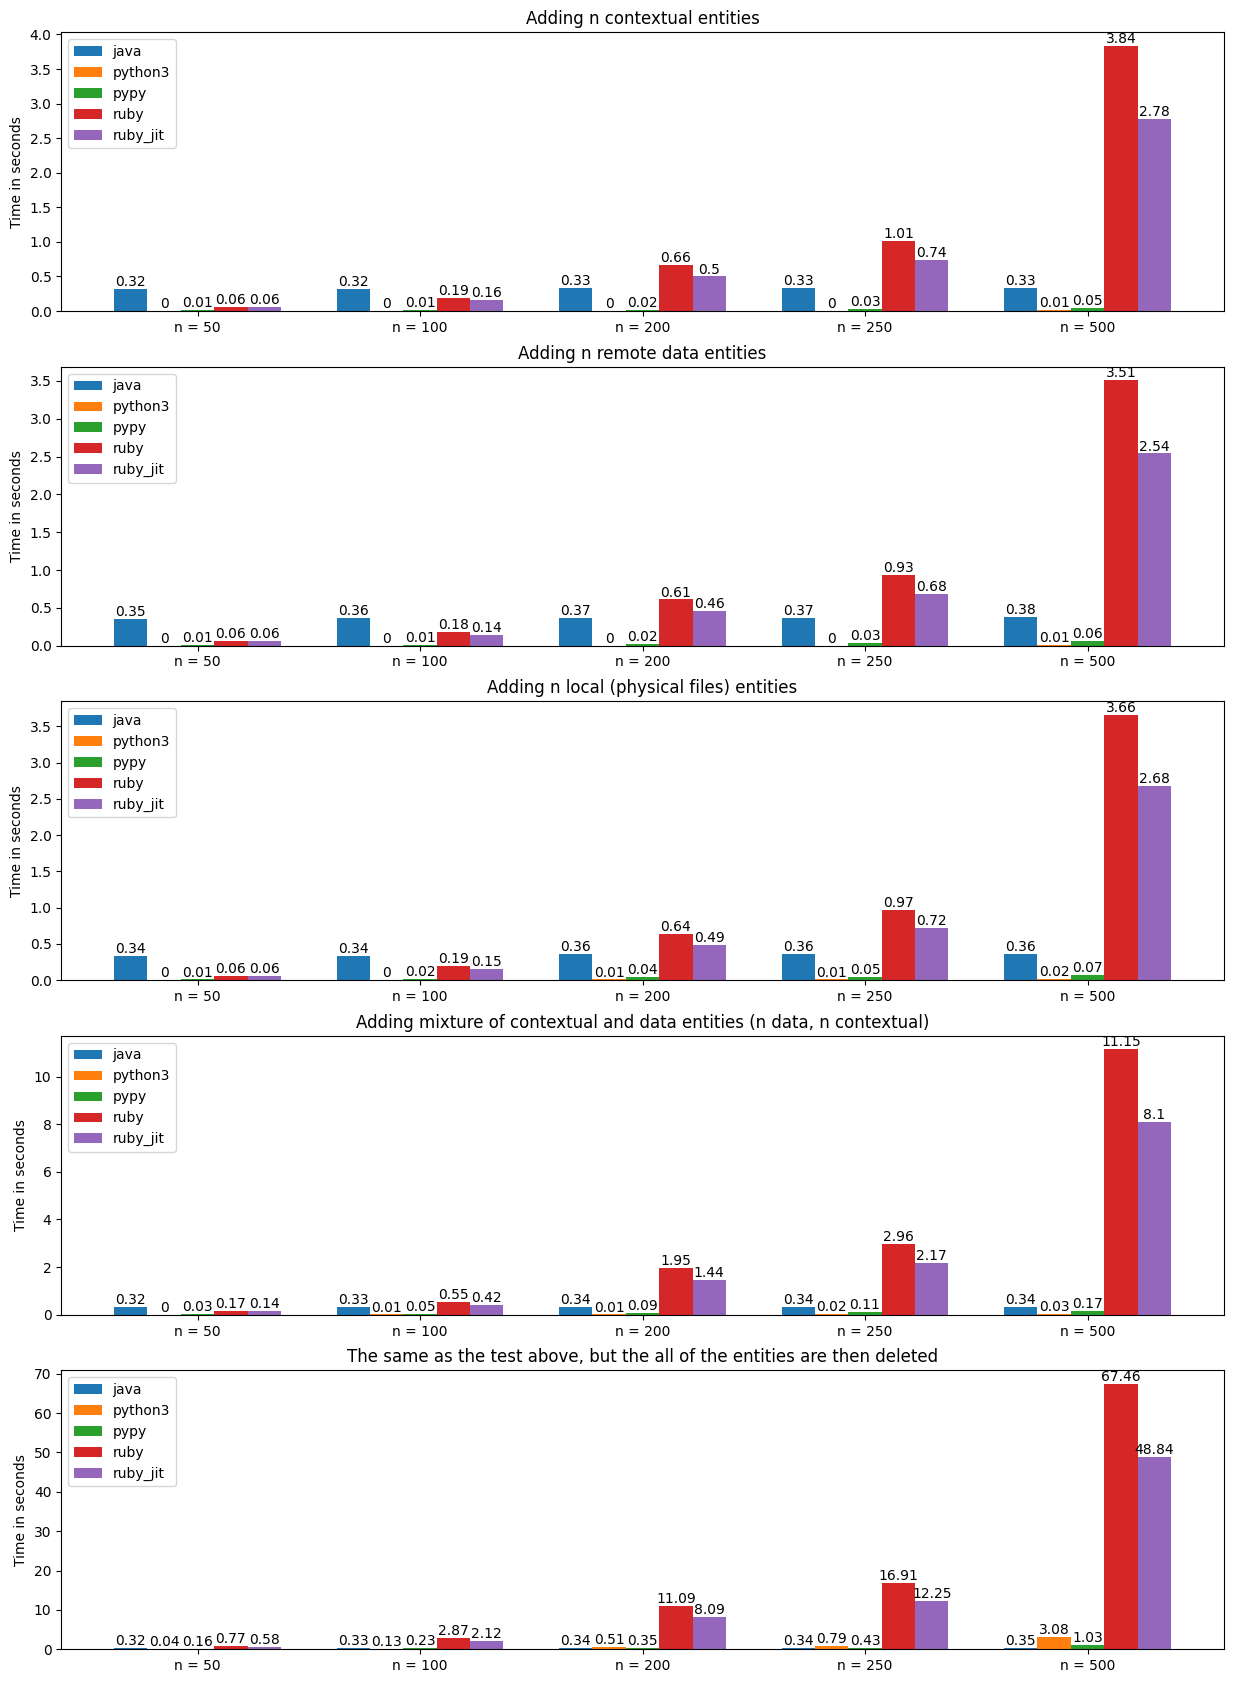

In [14]:
import matplotlib.pyplot as plt
import numpy as np


print(result)
names_prog = ['contextual', 'data_remote', 'data_local','mixture', 'deletion' ]


labels = ['java', 'python3', 'pypy', 'ruby', 'ruby_jit']
# if we wnat only a few of them tested
#labels = ['java', 'pypy']

lan_times = 5
test_times = 5

java_test = []
python3 = []
pypy = []
ruby = []
rubyjit = []

arrays = [[], [], [], [], []]



ticks = np.arange(len(java_test))

x = np.arange(test_times)
ticks = np.arange(test_times)

width = 0.15

# plot
fig, ax = plt.subplots(5,1)
names = []

for i in num_entities:
    names.append('n = ' + str(i))

for i in range(test_times):
    ax[i].set_ylabel("Time in seconds")
    ax[i].set_xticks(ticks)
    ax[i].set_xticklabels(names)

fig.set_figwidth(15)
fig.set_figheight(21)


for n in range(test_times):
    string_type = names_prog[n]
    arrays = [[], [], [], [], []]
    for i in range(lan_times):
        arrays[i] = np.around(result[string_type][labels[i]],2)

    base_width = ticks - 2*width
    for i in range(lan_times):
        br = ax[n].bar(base_width, arrays[i], width, label=labels[i])
        ax[n].bar_label(br)
        base_width += width


    
    ax[n].legend()

ax[0].set_title('Adding n contextual entities')
ax[1].set_title('Adding n remote data entities')
ax[2].set_title('Adding n local (physical files) entities')
ax[3].set_title('Adding mixture of contextual and data entities (n data, n contextual)')
ax[4].set_title('The same as the test above, but the all of the entities are then deleted')

plt.show()